In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [26]:
RANDOM_STATE = 110

train_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/train_data.csv")
test_data = pd.read_csv("C:/Users/KimDongyoung/Desktop/git_LGaimers5/Lg_aimers5/data/test_data.csv")

In [27]:
# 'Dam'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Θ Collect Result_Dam
CURE SPEED Collect Result_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION Θ Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(

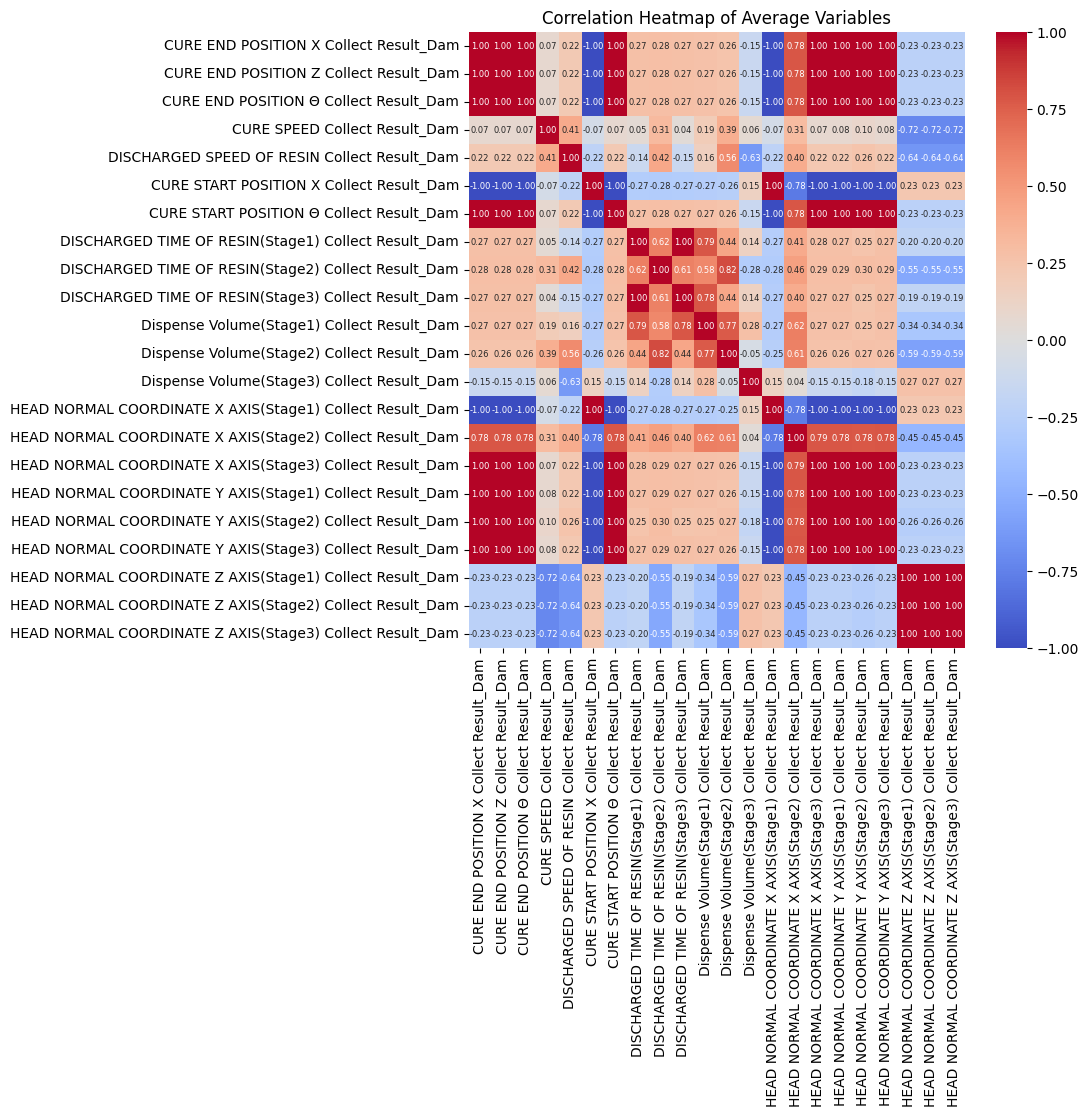

In [28]:
# 상관계수
variables = [
    'CURE END POSITION X Collect Result_Dam',
    'CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE SPEED Collect Result_Dam',
    'DISCHARGED SPEED OF RESIN Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
'Dispense Volume(Stage1) Collect Result_Dam',
'Dispense Volume(Stage2) Collect Result_Dam',
'Dispense Volume(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam'
]

# Compute the correlation matrix
correlation_matrix = train_data[variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [29]:
columns_to_drop = ['CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [30]:
# 'Dam'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE SPEED Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
Head Clean Position Z Collect Result_Dam
Head Purge Position Z Collect Result_Dam
Head Zero Position Y Collect Result_Dam
Head Zero Position Z Collect Result_Dam
Machine Tact time Collect Result_Dam
PalletID Collect Result_Dam
Production Qty Collect Result_Dam
Receip No Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam
Stage1 Circle2 Distance Speed Collect Result_Dam
Stage1 Circle3 Distance Speed 

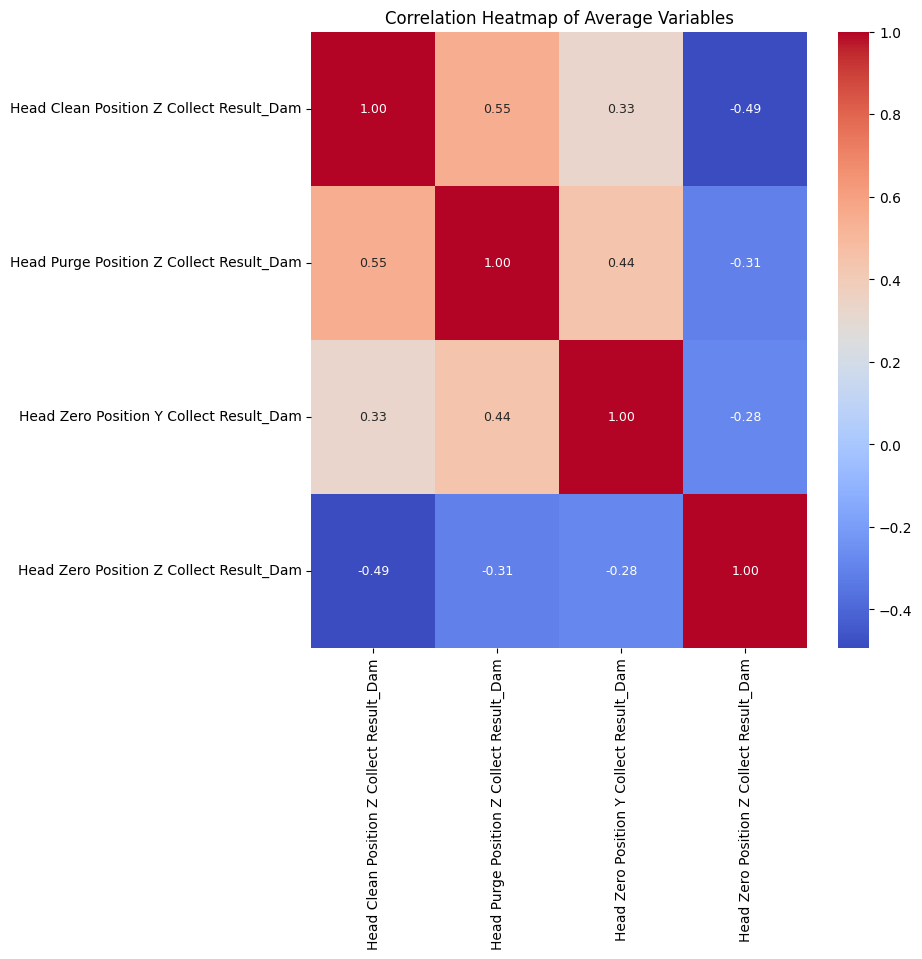

In [31]:
# 상관계수
variables = [
    'Head Clean Position Z Collect Result_Dam',
    'Head Purge Position Z Collect Result_Dam',
    'Head Zero Position Y Collect Result_Dam',
    'Head Zero Position Z Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 9})

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [32]:
# 'Circle'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='Circle').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
Stage1 Circle1 Distance Speed Collect Result_Dam
Stage1 Circle2 Distance Speed Collect Result_Dam
Stage1 Circle3 Distance Speed Collect Result_Dam
Stage1 Circle4 Distance Speed Collect Result_Dam
Stage2 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle2 Distance Speed Collect Result_Dam
Stage2 Circle3 Distance Speed Collect Result_Dam
Stage2 Circle4 Distance Speed Collect Result_Dam
Stage3 Circle1 Distance Speed Collect Result_Dam
Stage3 Circle2 Distance Speed Collect Result_Dam
Stage3 Circle3 Distance Speed Collect Result_Dam
Stage3 Circle4 Distance Speed Collect Result_Dam


In [33]:
# 'Circle'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='Line').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
Stage1 Line1 Distance Speed Collect Result_Dam
Stage1 Line2 Distance Speed Collect Result_Dam
Stage1 Line3 Distance Speed Collect Result_Dam
Stage1 Line4 Distance Speed Collect Result_Dam
Stage2 Line1 Distance Speed Collect Result_Dam
Stage2 Line2 Distance Speed Collect Result_Dam
Stage2 Line3 Distance Speed Collect Result_Dam
Stage2 Line4 Distance Speed Collect Result_Dam
Stage3 Line1 Distance Speed Collect Result_Dam
Stage3 Line2 Distance Speed Collect Result_Dam
Stage3 Line3 Distance Speed Collect Result_Dam
Stage3 Line4 Distance Speed Collect Result_Dam


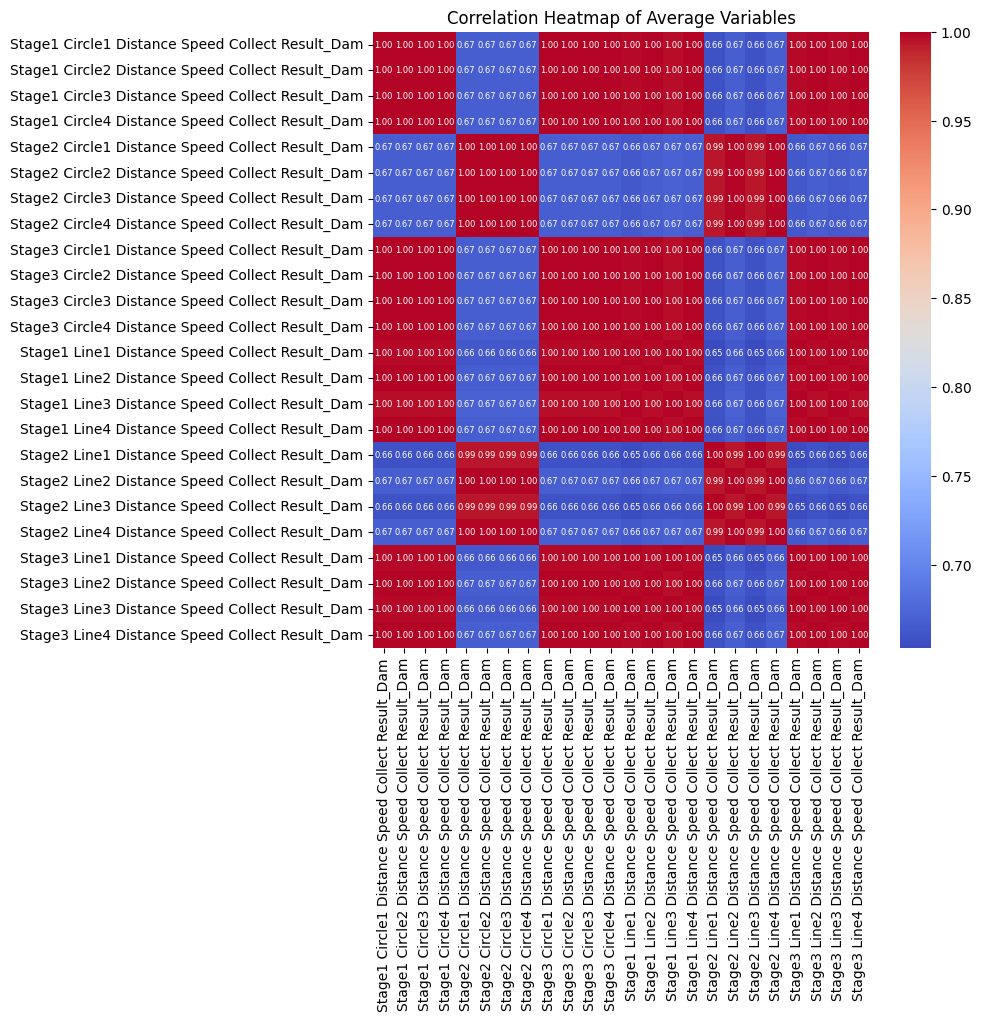

In [34]:
# 상관계수
variables = [
    'Stage1 Circle1 Distance Speed Collect Result_Dam',
'Stage1 Circle2 Distance Speed Collect Result_Dam',
'Stage1 Circle3 Distance Speed Collect Result_Dam',
'Stage1 Circle4 Distance Speed Collect Result_Dam',
'Stage2 Circle1 Distance Speed Collect Result_Dam',
'Stage2 Circle2 Distance Speed Collect Result_Dam',
'Stage2 Circle3 Distance Speed Collect Result_Dam',
'Stage2 Circle4 Distance Speed Collect Result_Dam',
'Stage3 Circle1 Distance Speed Collect Result_Dam',
'Stage3 Circle2 Distance Speed Collect Result_Dam',
'Stage3 Circle3 Distance Speed Collect Result_Dam',
'Stage3 Circle4 Distance Speed Collect Result_Dam',
'Stage1 Line1 Distance Speed Collect Result_Dam',
'Stage1 Line2 Distance Speed Collect Result_Dam',
'Stage1 Line3 Distance Speed Collect Result_Dam',
'Stage1 Line4 Distance Speed Collect Result_Dam',
'Stage2 Line1 Distance Speed Collect Result_Dam',
'Stage2 Line2 Distance Speed Collect Result_Dam',
'Stage2 Line3 Distance Speed Collect Result_Dam',
'Stage2 Line4 Distance Speed Collect Result_Dam',
'Stage3 Line1 Distance Speed Collect Result_Dam',
'Stage3 Line2 Distance Speed Collect Result_Dam',
'Stage3 Line3 Distance Speed Collect Result_Dam',
'Stage3 Line4 Distance Speed Collect Result_Dam'
]

# Compute the correlation matrix
correlation_matrix = train_data[variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [35]:
columns_to_drop = ['Stage1 Circle2 Distance Speed Collect Result_Dam',
'Stage1 Circle3 Distance Speed Collect Result_Dam',
'Stage1 Circle4 Distance Speed Collect Result_Dam',
'Stage3 Circle1 Distance Speed Collect Result_Dam',
'Stage3 Circle2 Distance Speed Collect Result_Dam',
'Stage3 Circle3 Distance Speed Collect Result_Dam',
'Stage3 Circle4 Distance Speed Collect Result_Dam',
'Stage1 Line1 Distance Speed Collect Result_Dam',
'Stage1 Line2 Distance Speed Collect Result_Dam',
'Stage1 Line3 Distance Speed Collect Result_Dam',
'Stage1 Line4 Distance Speed Collect Result_Dam',
'Stage3 Line1 Distance Speed Collect Result_Dam',
'Stage3 Line2 Distance Speed Collect Result_Dam',
'Stage3 Line3 Distance Speed Collect Result_Dam',
'Stage3 Line4 Distance Speed Collect Result_Dam']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [36]:
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE SPEED Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
Head Clean Position Z Collect Result_Dam
Head Purge Position Z Collect Result_Dam
Head Zero Position Y Collect Result_Dam
Head Zero Position Z Collect Result_Dam
Machine Tact time Collect Result_Dam
PalletID Collect Result_Dam
Production Qty Collect Result_Dam
Receip No Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle2 Distance Speed 

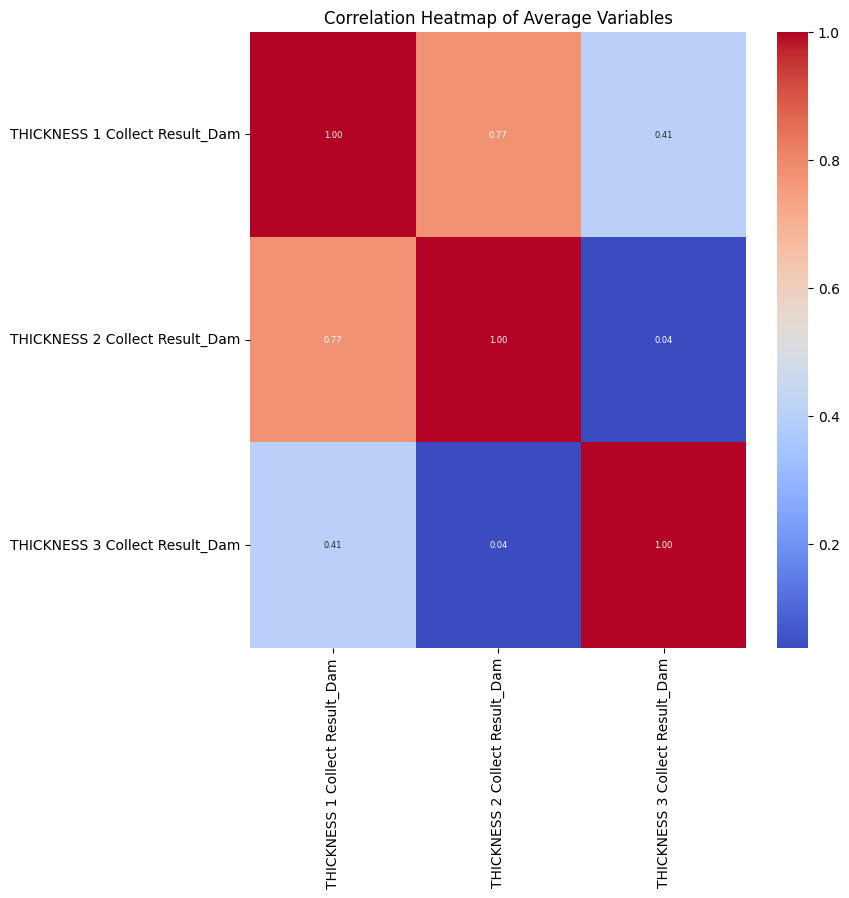

In [37]:
# 상관계수
variables = [
    'THICKNESS 1 Collect Result_Dam',
'THICKNESS 2 Collect Result_Dam',
'THICKNESS 3 Collect Result_Dam',
]

# Compute the correlation matrix
correlation_matrix = train_data[variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [38]:
columns_to_drop = ['PalletID Collect Result_Dam', 'Production Qty Collect Result_Dam']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [39]:
Process_Desc_col = train_data.filter(like='_Dam').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE SPEED Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
Head Clean Position Z Collect Result_Dam
Head Purge Position Z Collect Result_Dam
Head Zero Position Y Collect Result_Dam
Head Zero Position Z Collect Result_Dam
Machine Tact time Collect Result_Dam
Receip No Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle2 Distance Speed Collect Result_Dam
Stage2 Circle3 Distance Speed Collect Resul

In [40]:
Process_Desc_col = train_data.filter(like='Circle').columns

# 필터링된 열 이름 출력
print("<Dam_circle 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam_circle 공정 관련 변수>
Stage1 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle1 Distance Speed Collect Result_Dam
Stage2 Circle2 Distance Speed Collect Result_Dam
Stage2 Circle3 Distance Speed Collect Result_Dam
Stage2 Circle4 Distance Speed Collect Result_Dam


In [45]:
train_data['Stage2 Circles Distance Speed Collect Result_Dam'] = train_data['Stage2 Circle1 Distance Speed Collect Result_Dam']+ train_data['Stage2 Circle2 Distance Speed Collect Result_Dam']
+ train_data['Stage2 Circle3 Distance Speed Collect Result_Dam'] + train_data['Stage2 Circle4 Distance Speed Collect Result_Dam']

test_data['Stage2 Circles Distance Speed Collect Result_Dam'] = test_data['Stage2 Circle1 Distance Speed Collect Result_Dam']+ test_data['Stage2 Circle2 Distance Speed Collect Result_Dam']
+ test_data['Stage2 Circle3 Distance Speed Collect Result_Dam'] + test_data['Stage2 Circle4 Distance Speed Collect Result_Dam']

0        18000.0
1        11000.0
2        18000.0
3         8000.0
4        13000.0
          ...   
17356     8000.0
17357    13000.0
17358    13000.0
17359    24000.0
17360    18000.0
Length: 17361, dtype: float64

In [44]:
train_data['Stage2 Circles Distance Speed Collect Result_Dam'].value_counts()

Stage2 Circles Distance Speed Collect Result_Dam
18000    11823
13000     8033
11000     6051
10600     5295
8000      4008
24000     3469
10000     1351
16000      440
12000       36
Name: count, dtype: int64

In [41]:
Process_Desc_col = train_data.filter(like='Line').columns

# 필터링된 열 이름 출력
print("<Line_circle 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Line_circle 공정 관련 변수>
Stage2 Line1 Distance Speed Collect Result_Dam
Stage2 Line2 Distance Speed Collect Result_Dam
Stage2 Line3 Distance Speed Collect Result_Dam
Stage2 Line4 Distance Speed Collect Result_Dam


In [46]:
train_data['Stage2 Lines Distance Speed Collect Result_Dam'] = train_data['Stage2 Line1 Distance Speed Collect Result_Dam']+ train_data['Stage2 Line2 Distance Speed Collect Result_Dam']
+ train_data['Stage2 Line3 Distance Speed Collect Result_Dam'] + train_data['Stage2 Line4 Distance Speed Collect Result_Dam']

test_data['Stage2 Lines Distance Speed Collect Result_Dam'] = test_data['Stage2 Line1 Distance Speed Collect Result_Dam']+ test_data['Stage2 Line2 Distance Speed Collect Result_Dam']
+ test_data['Stage2 Line3 Distance Speed Collect Result_Dam'] + test_data['Stage2 Line4 Distance Speed Collect Result_Dam']

0        18000.0
1        11000.0
2        18000.0
3         8000.0
4        12000.0
          ...   
17356     8000.0
17357    12000.0
17358    13000.0
17359    24000.0
17360    18000.0
Length: 17361, dtype: float64

In [47]:
train_data['Stage2 Lines Distance Speed Collect Result_Dam'].value_counts()

Stage2 Lines Distance Speed Collect Result_Dam
18000    11823
11000     6024
13000     5481
10600     5295
8000      4008
24000     3469
12000     2493
10000     1351
16000      440
11500       90
11300       27
19500        5
Name: count, dtype: int64

In [48]:
columns_to_drop = ['Stage2 Circle1 Distance Speed Collect Result_Dam',
'Stage2 Circle2 Distance Speed Collect Result_Dam',
'Stage2 Circle3 Distance Speed Collect Result_Dam',
'Stage2 Circle4 Distance Speed Collect Result_Dam',
'Stage2 Line1 Distance Speed Collect Result_Dam',
'Stage2 Line2 Distance Speed Collect Result_Dam',
'Stage2 Line3 Distance Speed Collect Result_Dam',
'Stage2 Line4 Distance Speed Collect Result_Dam']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [49]:
Process_Desc_col = train_data.filter(like='Dam').columns

# 필터링된 열 이름 출력
print("<Line_circle 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Line_circle 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE SPEED Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
Head Clean Position Z Collect Result_Dam
Head Purge Position Z Collect Result_Dam
Head Zero Position Y Collect Result_Dam
Head Zero Position Z Collect Result_Dam
Machine Tact time Collect Result_Dam
Receip No Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam
THICKNESS 1 Collect Result_Dam
THICKNESS 2 Collect Result_Dam
THICKNESS 3 Collect Result_Dam
WorkMode Collect Result_Dam
Stage2 Circl

In [50]:
columns_to_drop = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [51]:
Process_Desc_col = train_data.filter(like='Dam').columns

# 필터링된 열 이름 출력
print("<Line_circle 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Line_circle 공정 관련 변수>
CURE END POSITION X Collect Result_Dam
CURE SPEED Collect Result_Dam
DISCHARGED SPEED OF RESIN Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
Dispense Volume(Stage1) Collect Result_Dam
Dispense Volume(Stage2) Collect Result_Dam
Dispense Volume(Stage3) Collect Result_Dam
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam
Head Clean Position Z Collect Result_Dam
Head Purge Position Z Collect Result_Dam
Head Zero Position Y Collect Result_Dam
Head Zero Position Z Collect Result_Dam
Machine Tact time Collect Result_Dam
Receip No Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam
THICKNESS 1 Collect Result_Dam
THICKNESS 2 Collect Result_Dam
THICKNESS 3 Collect Result_Dam
WorkMode Collect Result_Dam
Stage2 Circles Distance Speed Collect Result_Dam
Stage2 Lines Dist

In [52]:
# '_fill1'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Fill1').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
DISCHARGED SPEED OF RESIN Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1
Dispense Volume(Stage1) Collect Result_Fill1
Dispense Volume(Stage2) Collect Result_Fill1
Dispense Volume(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1
Head Purge Position Z Collect Result_Fill1
Machine Tac

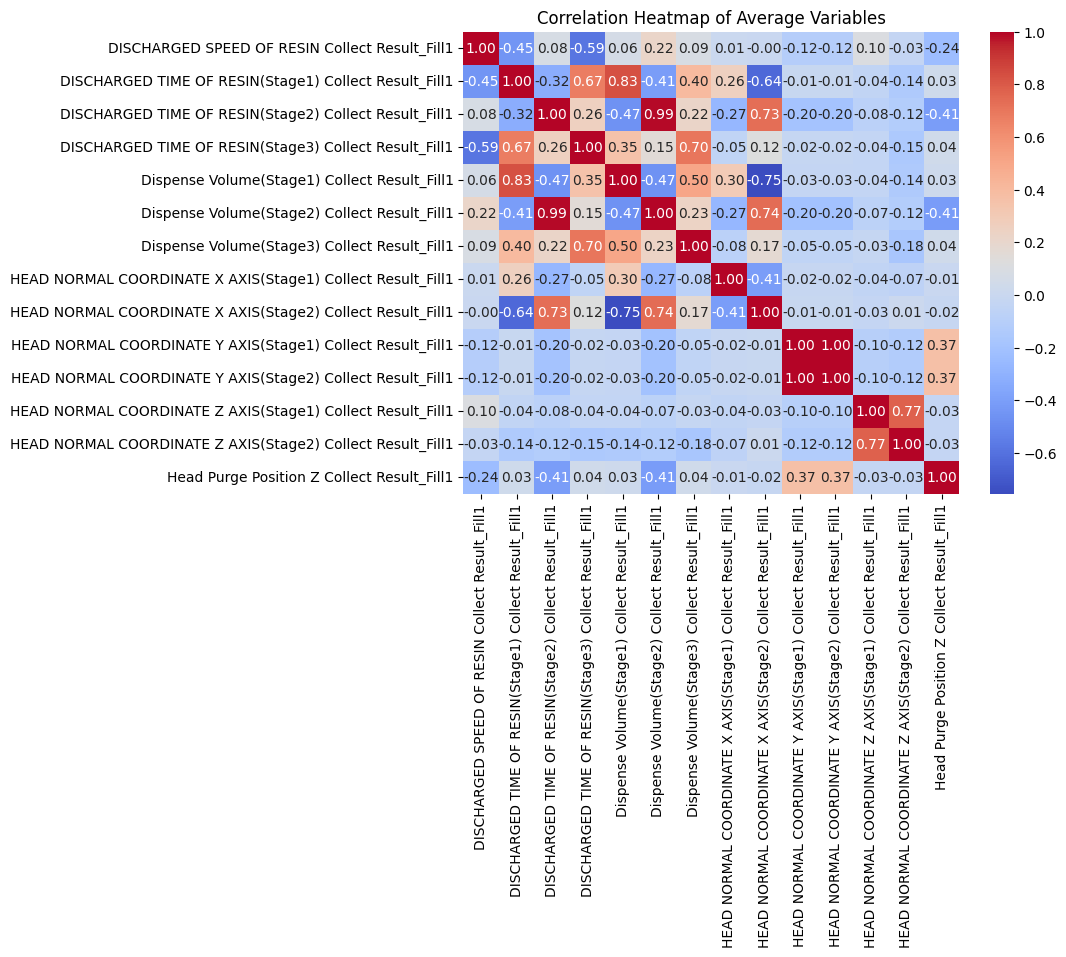

In [53]:
# Select the new average variables
avg_variables = [
    'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
'Dispense Volume(Stage1) Collect Result_Fill1',
'Dispense Volume(Stage2) Collect Result_Fill1',
'Dispense Volume(Stage3) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
'Head Purge Position Z Collect Result_Fill1'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [60]:
columns_to_drop = ['Dispense Volume(Stage2) Collect Result_Fill1', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [61]:
columns_to_drop = ['PalletID Collect Result_Fill1',
                  'Production Qty Collect Result_Fill1',
                  'Receip No Collect Result_Fill1',
                  'WorkMode Collect Result_Fill1']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [62]:
# '_fill1'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Fill1').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
DISCHARGED SPEED OF RESIN Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1
Dispense Volume(Stage1) Collect Result_Fill1
Dispense Volume(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1
Head Purge Position Z Collect Result_Fill1
Machine Tact time Collect Result_Fill1


In [64]:
# '_fill2'를 포함하는 열 이름 필터링
Process_Desc_col = train_data.filter(like='_Fill2').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Fill2
CURE END POSITION Z Collect Result_Fill2
CURE SPEED Collect Result_Fill2
CURE STANDBY POSITION Z Collect Result_Fill2
CURE START POSITION X Collect Result_Fill2
CURE START POSITION Z Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2
HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2
HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2
HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2
Head Purge Position Z Collect Result_Fill2
Machine Tact time Collect Result_Fill2
PalletID Collect Result_Fill2
Production Qty Collect Result_Fill2
Recei

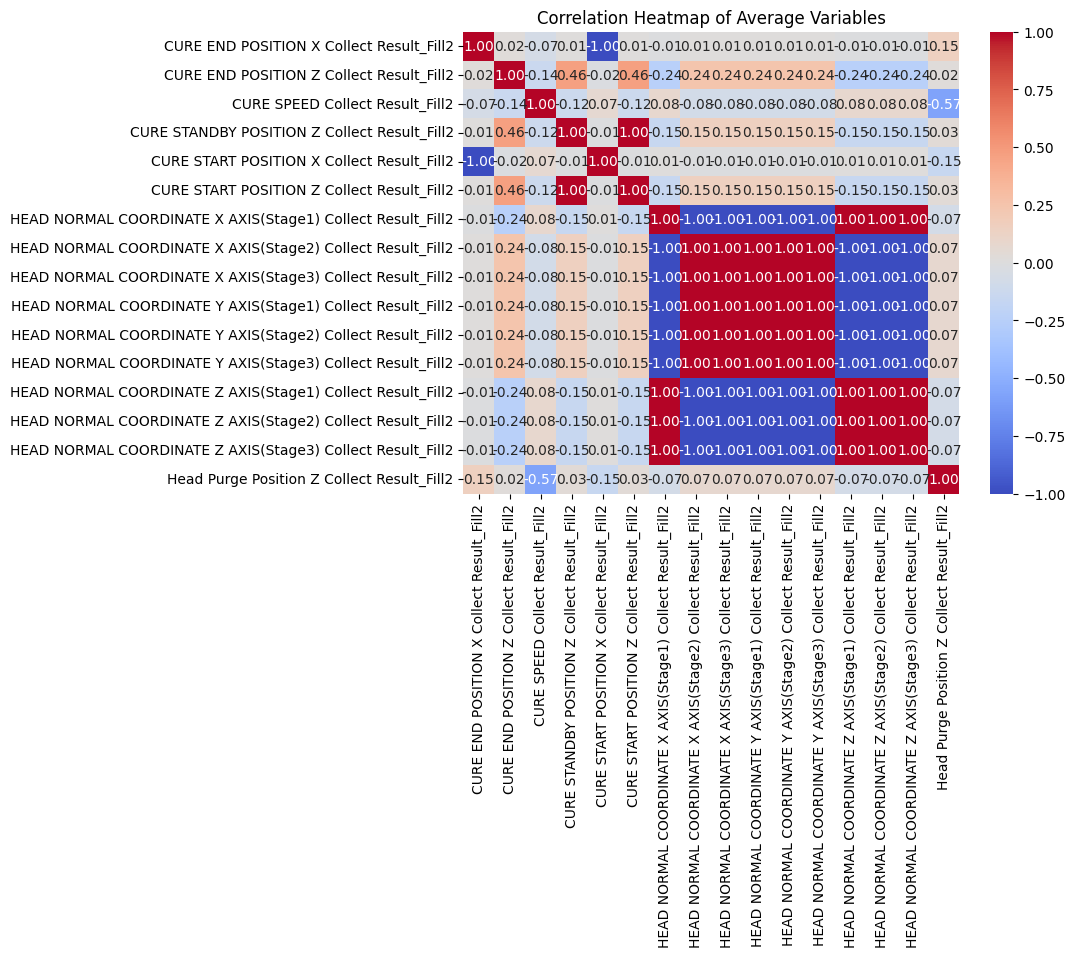

In [65]:
# Select the new average variables
avg_variables = [
    'CURE END POSITION X Collect Result_Fill2',
'CURE END POSITION Z Collect Result_Fill2',
'CURE SPEED Collect Result_Fill2',
'CURE STANDBY POSITION Z Collect Result_Fill2',
'CURE START POSITION X Collect Result_Fill2',
'CURE START POSITION Z Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
'Head Purge Position Z Collect Result_Fill2'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [66]:
columns_to_drop = ['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [67]:
Process_Desc_col = train_data.filter(like='_Fill2').columns

# 필터링된 열 이름 출력
print("<Dam 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<Dam 공정 관련 변수>
CURE END POSITION X Collect Result_Fill2
CURE END POSITION Z Collect Result_Fill2
CURE SPEED Collect Result_Fill2
CURE STANDBY POSITION Z Collect Result_Fill2
CURE START POSITION X Collect Result_Fill2
CURE START POSITION Z Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2
Head Purge Position Z Collect Result_Fill2
Machine Tact time Collect Result_Fill2
PalletID Collect Result_Fill2
Production Qty Collect Result_Fill2
Receip No Collect Result_Fill2
WorkMode Collect Result_Fill2


In [68]:
columns_to_drop = ['PalletID Collect Result_Fill2',
'Production Qty Collect Result_Fill2',
'WorkMode Collect Result_Fill2']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [69]:
Process_Desc_col = train_data.filter(like='_AutoClave').columns

# 필터링된 열 이름 출력
print("<AutoClave 공정 관련 변수>")
for col in Process_Desc_col:
    print(col)

<AutoClave 공정 관련 변수>
1st Pressure Collect Result_AutoClave
1st Pressure 1st Pressure Unit Time_AutoClave
2nd Pressure Collect Result_AutoClave
2nd Pressure Unit Time_AutoClave
3rd Pressure Collect Result_AutoClave
3rd Pressure Unit Time_AutoClave
Chamber Temp. Collect Result_AutoClave
Chamber Temp. Unit Time_AutoClave
Chamber Temp. Judge Value_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave
GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave


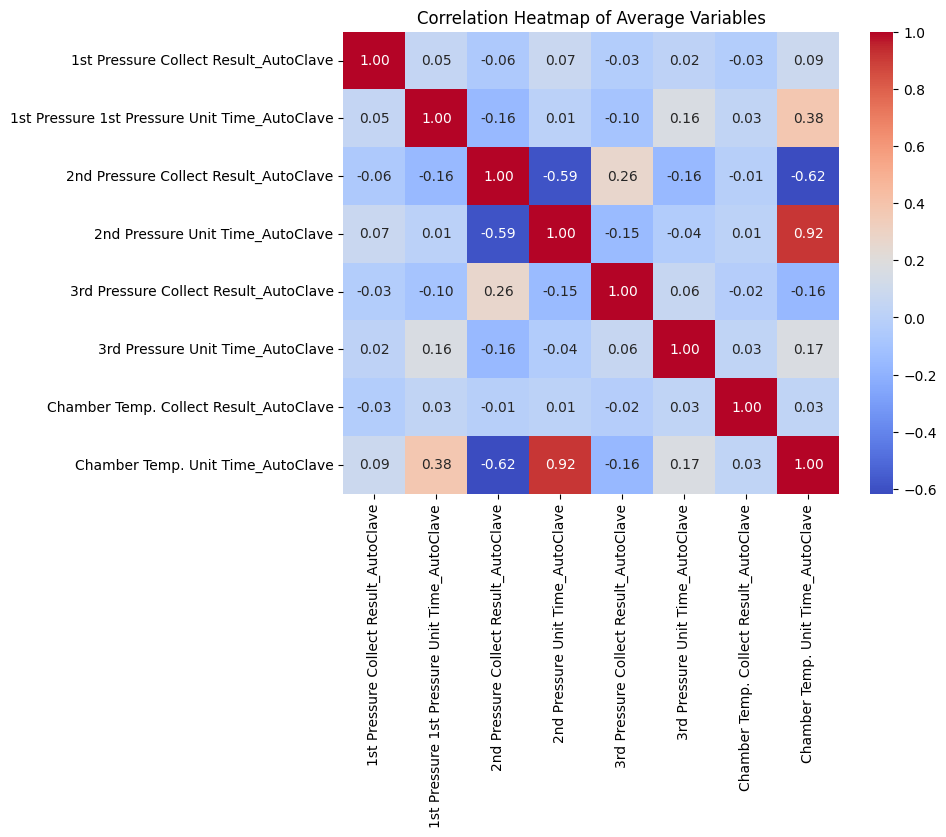

In [70]:
# Select the new average variables
avg_variables = [
    '1st Pressure Collect Result_AutoClave',
'1st Pressure 1st Pressure Unit Time_AutoClave',
'2nd Pressure Collect Result_AutoClave',
'2nd Pressure Unit Time_AutoClave',
'3rd Pressure Collect Result_AutoClave',
'3rd Pressure Unit Time_AutoClave',
'Chamber Temp. Collect Result_AutoClave',
'Chamber Temp. Unit Time_AutoClave'
]

# Compute the correlation matrix
correlation_matrix = train_data[avg_variables].corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Average Variables")

# Display the plot
plt.show()

In [73]:
columns_to_drop = ['Chamber Temp. Unit Time_AutoClave']

train_data = train_data.drop(columns=columns_to_drop,inplace=False)
test_data = test_data.drop(columns=columns_to_drop,inplace=False)

In [74]:
train_data

,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE SPEED Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,Dispense Volume(Stage1) Collect Result_Dam,Dispense Volume(Stage2) Collect Result_Dam,...,CURE START POSITION Z Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,Receip No Collect Result_Fill2,target,Dispenser_num,Stage2 Circles Distance Speed Collect Result_Dam,Stage2 Lines Distance Speed Collect Result_Dam
0,AJX75334505,4F1XA938-1,240,100,16,14.9,8.4,14.7,1.04,0.58,...,33,835.5,NaN,114.612,19.9,1,Normal,#1,10600,10600
1,AJX75334505,3KPM0016-2,240,70,10,21.3,4.9,21.3,1.49,0.34,...,33,835.5,NaN,85.000,19.6,1,Normal,#1,18000,18000
2,AJX75334501,4E1X9167-1,1000,85,16,14.7,8.5,14.7,1.61,0.93,...,33,305.0,OK,114.612,19.8,1,Normal,#2,10600,10600
3,AJX75334501,3K1X0057-1,1000,70,10,21.3,8.4,21.3,1.49,0.58,...,33,305.0,NaN,85.000,19.9,1,Normal,#2,10000,10000
4,AJX75334501,3HPM0007-1,240,70,10,9.7,4.9,9.6,0.67,0.34,...,33,835.5,NaN,85.000,19.7,1,Normal,#1,18000,18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,AJX75334501,3J1XF434-2,240,70,10,17.0,5.0,17.0,1.19,0.35,...,33,835.5,NaN,85.000,19.2,1,Normal,#1,18000,18000
40502,AJX75334501,4E1XC796-1,1000,100,16,14.9,8.5,14.7,1.04,0.59,...,33,304.8,NaN,114.612,20.5,1,Normal,#2,10600,10600
40503,AJX75334501,4C1XD438-1,240,100,16,14.2,8.2,14.3,0.99,0.57,...,33,835.5,OK,85.000,19.7,1,Normal,#1,11000,11000
40504,AJX75334501,3I1XA258-1,1000,70,10,9.7,4.9,9.7,0.67,0.34,...,33,305.0,NaN,85.000,20.1,1,Normal,#2,18000,18000
